In [344]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
# import pickle
# import math
# from area import area
# import fiona
# from shapely.geometry import shape
# from pyproj import Proj, transform, Transformer
# from shapely.geometry import Polygon
import folium as f
# from scipy.spatial import ConvexHull

g_pickle = "./data/01_cambridge.gpickle"
g = nx.read_gpickle(g_pickle)

type(g)


networkx.classes.digraph.DiGraph

In [349]:
arbitrary_sub_g = random.sample(g.nodes().data(), 10) 

node_ids = [node[1]['id'] for node in arbitrary_sub_g]
print(node_ids)

points = []
for node in arbitrary_sub_g:
    lat, lon = node[1]['lat'], node[1]['lon']
    points.append([lat, lon])


points = np.array(points)
from scipy.spatial import Delaunay
tri = Delaunay(points)

['7658055840', '61447234', '7102218445', '7628856051', '7629494183', '7628787081', '7634847119', '329174011', '7628787368', '7794600739']


In [350]:
tri = Delaunay(points)

In [351]:
tri

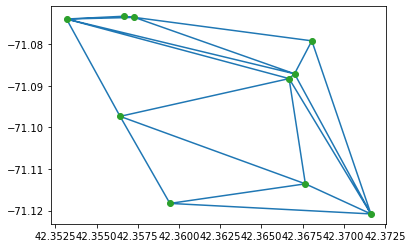

In [352]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [353]:
def edges_from_simplex(tri):
    edges = [] 
    points = tri.points
    for simplex in tri.simplices:
        a = points[(simplex[0])].tolist()
        b = points[simplex[1]].tolist()
        c = points[simplex[2]].tolist()
        
        edges.append([a,b])
        edges.append([b,c])
        edges.append([c,a])
    
    return_edges = []
    for edge in edges:
        if edge not in return_edges and [edge[1], edge[0]] not in return_edges:
            return_edges.append(edge)
        
    
    return return_edges


In [354]:
edges_from_simplex(tri)

[[[42.3676704, -71.1135779], [42.3594521, -71.1182872]],
 [[42.3594521, -71.1182872], [42.3716465, -71.1208186]],
 [[42.3716465, -71.1208186], [42.3676704, -71.1135779]],
 [[42.3676704, -71.1135779], [42.3564294, -71.0973301]],
 [[42.3564294, -71.0973301], [42.3594521, -71.1182872]],
 [[42.3564294, -71.0973301], [42.3666832, -71.0882415]],
 [[42.3666832, -71.0882415], [42.3531819, -71.0738995]],
 [[42.3531819, -71.0738995], [42.3564294, -71.0973301]],
 [[42.3676704, -71.1135779], [42.3666832, -71.0882415]],
 [[42.3716465, -71.1208186], [42.3666832, -71.0882415]],
 [[42.3573021, -71.0735067], [42.3566563, -71.0732291]],
 [[42.3566563, -71.0732291], [42.3531819, -71.0738995]],
 [[42.3531819, -71.0738995], [42.3573021, -71.0735067]],
 [[42.3573021, -71.0735067], [42.3670122, -71.0870827]],
 [[42.3670122, -71.0870827], [42.3680627, -71.0791504]],
 [[42.3680627, -71.0791504], [42.3573021, -71.0735067]],
 [[42.3670122, -71.0870827], [42.3716465, -71.1208186]],
 [[42.3716465, -71.1208186], [4

In [355]:
m = f.Map(location = [42.3611108,-71.119977], zoom_start=14)

for node_data in g.nodes().data():
    node_id = node_data[1]["id"]
    lon,lat = node_data[1]['lon'], node_data[1]['lat'] 
    if node_id in node_ids:
        m.add_child(f.Marker(location=[lat,lon], color="blue", radius=1, tooltip=node_id))
    else:
        m.add_child(f.CircleMarker(location=[lat,lon], color="red", radius=1, tooltip=node_id))

m

In [357]:
print(node_ids)
nx.shortest_path_length(g, source='7628856051', target='7634847119', weight='havlen')

['7658055840', '61447234', '7102218445', '7628856051', '7629494183', '7628787081', '7634847119', '329174011', '7628787368', '7794600739']


NetworkXNoPath: Node 7634847119 not reachable from 7628856051

In [ ]:
nx.shortest_path_length(g, source='2742595194', target='4097769632', weight='havlen')

In [224]:
"""Distance helpers."""

import math


EARTH_CIRCUMFERENCE = 6378137     # earth circumference in meters


def great_circle_distance(latlong_a, latlong_b):
    """
    >>> coord_pairs = [
    ...     # between eighth and 31st and eighth and 30th
    ...     [(40.750307,-73.994819), (40.749641,-73.99527)],
    ...     # sanfran to NYC ~2568 miles
    ...     [(37.784750,-122.421180), (40.714585,-74.007202)],
    ...     # about 10 feet apart
    ...     [(40.714732,-74.008091), (40.714753,-74.008074)],
    ...     # inches apart
    ...     [(40.754850,-73.975560), (40.754851,-73.975561)],
    ... ]
    
    >>> for pair in coord_pairs:
    ...     great_circle_distance(pair[0], pair[1]) # doctest: +ELLIPSIS
    83.325362855055...
    4133342.6554530...
    2.7426970360283...
    0.1396525521278...
    """
    lat1, lon1 = latlong_a
    lat2, lon2 = latlong_b

    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = (math.sin(dLat / 2) * math.sin(dLat / 2) +
            math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * 
            math.sin(dLon / 2) * math.sin(dLon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = EARTH_CIRCUMFERENCE * c
    
    return d